# Projeto Parte III - Victoria Wermelinger

Este notebook realiza uma análise de um conjunto de dados sobre hábitos digitais e saúde mental. O objetivo é prever a categoria de humor com base em variáveis como uso de redes sociais, horas de sono e nível de estresse.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df_habits_mental = pd.read_csv("/home/wermelinger_v/Documentos/GitHub/biblioteca_projetos/ CODERHOUSE - 7209 Data Science  /habitos_digitais_vs_saude_mental_salvo.csv")
df_habits_mental.head()

,tempo_uso_tela_hrs,plataformas_redes_sociais_usadas,horas_no_tiktok,horas_sono,nivel_estresse,pontuacao_humor
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10


In [23]:
def categorizar_humor(score):
    if score <= 4:
        return "Ruim"
    elif score <= 7:
        return "Médio"
    else:
        return "Bom"

df_habits_mental["pontuacao_humor"] = df_habits_mental["pontuacao_humor"].apply(categorizar_humor)


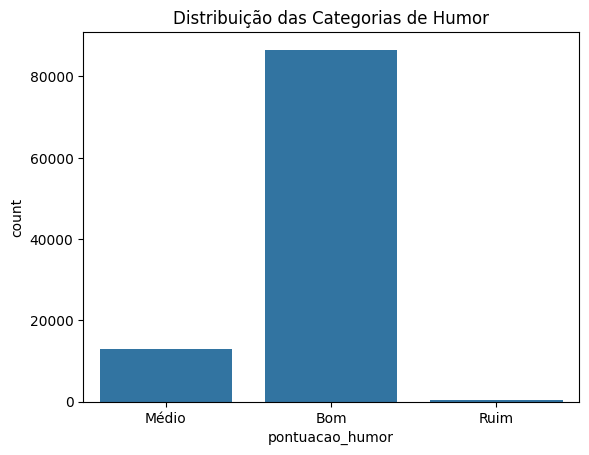

In [15]:
sns.countplot(x='pontuacao_humor', data=df_habits_mental)
plt.title("Distribuição das Categorias de Humor")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Separar features e target
X = df_habits_mental.drop(columns=["pontuacao_humor", "pontuacao_humor"])
y = df_habits_mental["pontuacao_humor"]

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selecionar 3 melhores features
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_scaled, y)

# Ver quais features foram escolhidas
selected_features = X.columns[selector.get_support()].tolist()
print("Features selecionadas:", selected_features)




Features selecionadas: ['horas_no_tiktok', 'horas_sono', 'nivel_estresse']


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Treinar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever e avaliar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Bom       0.93      0.96      0.94     25977
       Médio       0.61      0.48      0.54      3902
        Ruim       0.35      0.19      0.25       121

    accuracy                           0.89     30000
   macro avg       0.63      0.54      0.58     30000
weighted avg       0.88      0.89      0.89     30000



### Conclusão

O modelo apresentou boa performance para a classe 'Bom', mas baixa performance nas categorias 'Médio' e 'Ruim', indicando um possível desbalanceamento das classes. As variáveis mais importantes para previsão foram:

- `hours_on_TikTok`
- `sleep_hours`
- `stress_level`

Essas variáveis estão diretamente relacionadas ao bem-estar mental e afetam significativamente o humor diário.


| Categoria | Precisão | Revocação | F1-score |
| --------- | -------- | --------- | -------- |
| **Bom**   | 0.93     | 0.96      | 0.94     |
| **Médio** | 0.61     | 0.48      | 0.54     |
| **Ruim**  | 0.35     | 0.19      | 0.25     |


# **Estrutura da Versão Não Supervisionada**

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("/home/wermelinger_v/Documentos/GitHub/biblioteca_projetos/ CODERHOUSE - 7209 Data Science  /habitos_digitais_vs_saude_mental_salvo.csv")

# Selecionar apenas colunas numéricas
X = df.drop(columns=["pontuacao_humor"])  # Remove a variável alvo (opcional)

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Descobrir o Número Ideal de Clusters (Método do Cotovelo)**


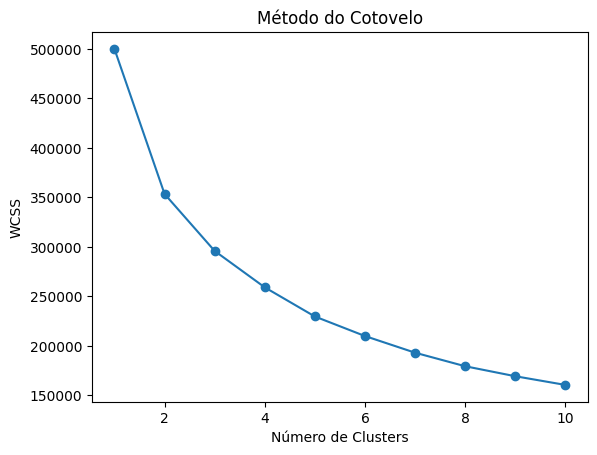

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


**Aplicar K-Means com o Número Ideal de Clusters**

In [ ]:
# Exemplo com 3 clusters (ajuste conforme o gráfico acima)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame original
df_habits_mental["cluster"] = clusters

**Visualizar os Clusters com PCA**

eduzir a dimensionalidade dos seus dados e plotar os pontos em um espaço de duas ou três dimensões, onde cada ponto representa um exemplo e cores diferentes indicam diferentes clusters

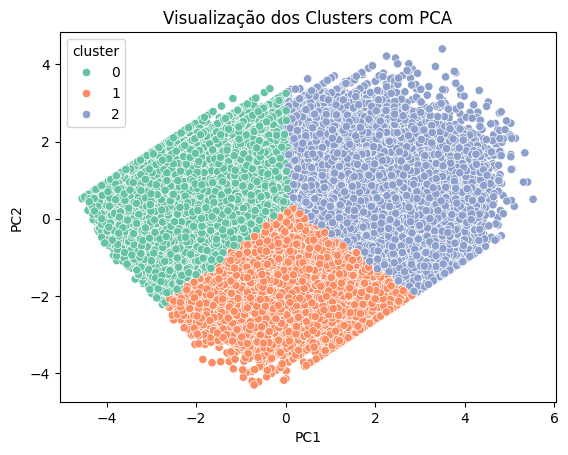

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["cluster"] = clusters

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="cluster", palette="Set2")
plt.title("Visualização dos Clusters com PCA")
plt.show()


In [ ]:
# Ver médias das variáveis por grupo
df.groupby("cluster").mean()

,tempo_uso_tela_hrs,plataformas_redes_sociais_usadas,horas_no_tiktok,horas_sono,nivel_estresse,pontuacao_humor
cluster,,,,,,
0,4.952203,2.999298,1.834728,8.145066,4.174263,9.887477
1,5.253238,2.957278,1.919917,5.733588,7.129108,8.640330
2,8.025814,3.037608,3.570560,6.895702,7.597253,8.506016
